In [1]:
import numpy as np
import typing as tp
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import sys
import os
import time
import random

In [2]:
from BaselineSolver import BaselineSolver
from IterativeSolver import IterativeSolver
from GreedySolver import GreedySolver
from GradientDescentSolver import GradientDescentSolver
from utils import run_tests, read_tests_simplex_in_ball, run_random_test, read_tests_simplex_plus_ball_in_ball
from utils import read_tests_degenerate_simplex_in_ball, read_tests_polyhedron_in_ball, read_tests_simplex_in_ball_with_argmaxes
from utils import read_tests_simplex_plus_ball_in_ball_with_argmaxes, read_tests_polyhedron_in_ball_with_argmaxes

In [3]:
support_a, support_b = read_tests_simplex_plus_ball_in_ball_with_argmaxes(f'./tests/20d/simplex-plus-ball-in-ball/58', 20)
solver_instance = GradientDescentSolver(20, support_a, support_b, learning_rate=1)
solver_instance.solve()

In [4]:
solver_instance.t, solver_instance.restart_counter

(0.9999999999999987, 0)

In [5]:
def plot_test_results(times: np.ndarray, t_errors: np.ndarray, title: str, colors: tp.Optional[np.ndarray] = None, fit=True, colorbar_name='delta') -> None:
    t_errors_without_zeros = np.copy(t_errors)
    t_errors_without_zeros[t_errors_without_zeros == 0.] = 1e-16
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)
    plt.xlabel('time, s')
    plt.ylabel('t_error')
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    if colors is not None:
        plt.scatter(times, t_errors_without_zeros, c=colors, cmap='viridis_r', norm=LogNorm())
        plt.colorbar(label=colorbar_name)
    else:
        plt.scatter(times, t_errors_without_zeros)

    if fit:
        a, b = np.polyfit(np.log(times), np.log(t_errors_without_zeros), 1)
        plt.plot(times, np.exp(a * np.log(times) + b), 'r', label=f't_error ~ 1 / time^{-a:.2f}')
        plt.legend()
    plt.title(title)
    plt.savefig(f'figures/{title.replace(" ", "_").replace(",", "")}')

In [6]:
def get_gd_simplex_in_ball_results(dimension: int, silent=True) -> tp.Tuple[np.ndarray, np.ndarray]:
    times = []
    t_errors = []
    for file in sorted(os.listdir(f'./tests/{dimension}d/simplex-in-ball/')):
        support_a, support_b = read_tests_simplex_in_ball_with_argmaxes(f'./tests/{dimension}d/simplex-in-ball/{file}', dimension)
        solver_instance = GradientDescentSolver(dimension, support_a, support_b)
        start_time = time.time()
        solver_instance.solve()
        end_time = time.time()
        times.append(end_time - start_time)
        t_errors.append(abs(1. - solver_instance.t))
        if not silent:
            print(f'test {file}\t time {end_time - start_time}\t t_error {abs(1. - solver_instance.t)}')

    return np.array(times), np.array(t_errors)

In [7]:
def get_gd_simplex_plus_ball_in_ball_results(dimension: int, silent=True) -> tp.Tuple[np.ndarray, np.ndarray]:
    times = []
    t_errors = []
    for file in sorted(os.listdir(f'./tests/{dimension}d/simplex-in-ball/')):
        support_a, support_b = read_tests_simplex_plus_ball_in_ball_with_argmaxes(f'./tests/{dimension}d/simplex-plus-ball-in-ball/{file}', dimension)
        solver_instance = GradientDescentSolver(dimension, support_a, support_b)
        start_time = time.time()
        solver_instance.solve()
        end_time = time.time()
        times.append(end_time - start_time)
        t_errors.append(abs(1. - solver_instance.t))
        if not silent:
            print(f'test {file}\t time {end_time - start_time}\t t_error {abs(1. - solver_instance.t)}\t final_iteration {solver_instance.final_iteration}')

    return np.array(times), np.array(t_errors)

In [8]:
def get_gd_polyhedron_in_ball_results(dimension: int, silent=True) -> tp.Tuple[np.ndarray, np.ndarray]:
    times = []
    t_errors = []
    ds = []
    for file in sorted(os.listdir(f'./tests/{dimension}d/polyhedron-in-ball/')):
        support_a, support_b, d = read_tests_polyhedron_in_ball_with_argmaxes(f'./tests/{dimension}d/polyhedron-in-ball/{file}', dimension)
        solver_instance = GradientDescentSolver(dimension, support_a, support_b)
        start_time = time.time()
        solver_instance.solve()
        end_time = time.time()
        times.append(end_time - start_time)
        t_errors.append(abs(1. - solver_instance.t))
        ds.append(d)
        if not silent:
            print(f'test {file}\t time {end_time - start_time}\t t_error {abs(1. - solver_instance.t)}')

    return np.array(times), np.array(t_errors), np.array(ds)

test 1	 time 0.25806474685668945	 t_error 6.661338147750939e-16	 final_iteration 5
test 10	 time 0.2588362693786621	 t_error 8.881784197001252e-16	 final_iteration 4
test 100	 time 0.2873060703277588	 t_error 4.440892098500626e-16	 final_iteration 4
test 11	 time 0.37123942375183105	 t_error 5.551115123125783e-16	 final_iteration 4
test 12	 time 0.38463544845581055	 t_error 4.440892098500626e-16	 final_iteration 4
test 13	 time 0.9126079082489014	 t_error 1.1102230246251565e-16	 final_iteration 4
test 14	 time 0.30474853515625	 t_error 6.661338147750939e-16	 final_iteration 4
test 15	 time 0.1434309482574463	 t_error 2.220446049250313e-16	 final_iteration 4
test 16	 time 0.13474440574645996	 t_error 2.220446049250313e-16	 final_iteration 4
test 17	 time 0.1686544418334961	 t_error 0.0	 final_iteration 4
test 18	 time 0.2485954761505127	 t_error 2.220446049250313e-16	 final_iteration 5
test 19	 time 0.09870290756225586	 t_error 2.220446049250313e-16	 final_iteration 4
test 2	 time 0.179

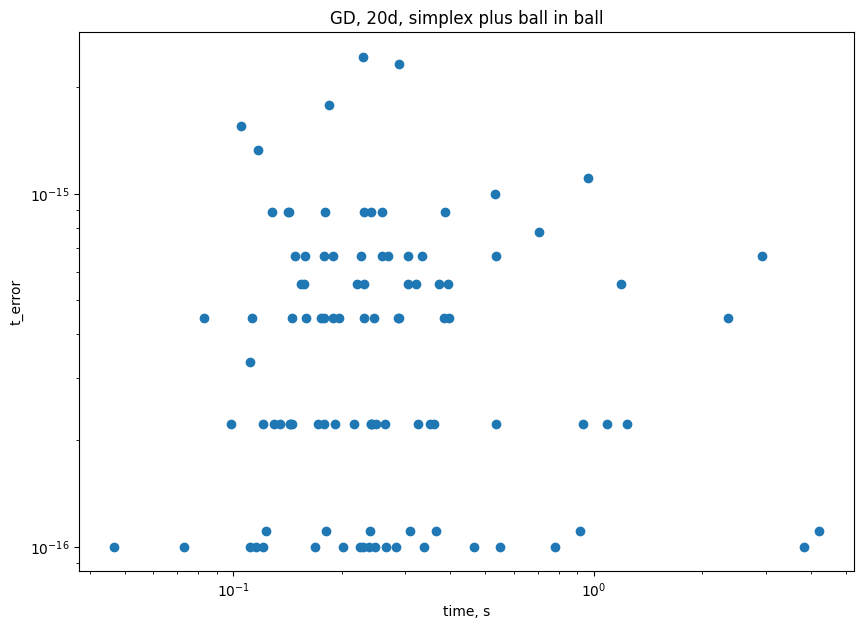

In [12]:
times_gd, errors_gd = get_gd_simplex_plus_ball_in_ball_results(20, silent=False)
plot_test_results(times_gd, errors_gd, 'GD, 20d, simplex plus ball in ball', fit=False)

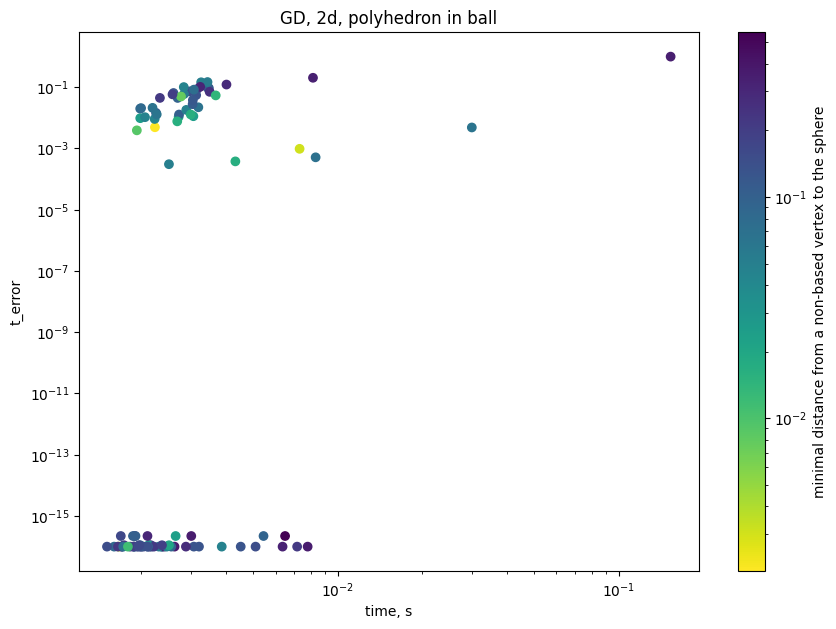

In [10]:
times_gd, errors_gd, ds = get_gd_polyhedron_in_ball_results(2, silent=True) 
plot_test_results(times_gd, errors_gd, 'GD, 2d, polyhedron in ball', fit=False, 
                  colors=ds, colorbar_name='minimal distance from a non-based vertex to the sphere')

test 1	 time 0.004514932632446289	 t_error 0.015436705286920649	 num_iterations 4
test 10	 time 0.003359079360961914	 t_error 0.0	 num_iterations 4
test 100	 time 0.004830121994018555	 t_error 0.003197044198238075	 num_iterations 5
test 11	 time 0.005465507507324219	 t_error 0.009446391931705378	 num_iterations 5
test 12	 time 0.006158113479614258	 t_error 0.08163793758017701	 num_iterations 5
test 13	 time 0.004773378372192383	 t_error 0.035019469445297324	 num_iterations 5
test 14	 time 0.017050504684448242	 t_error 0.14469928867756687	 num_iterations 9
test 15	 time 0.0064084529876708984	 t_error 2.220446049250313e-16	 num_iterations 5
test 16	 time 0.00501251220703125	 t_error 0.03551589860595694	 num_iterations 5
test 17	 time 0.004419088363647461	 t_error 0.00012049929305046891	 num_iterations 5
test 18	 time 0.004017353057861328	 t_error 0.0006057691435839008	 num_iterations 5
test 19	 time 0.009479761123657227	 t_error 0.0	 num_iterations 5
test 2	 time 0.0076084136962890625	 t

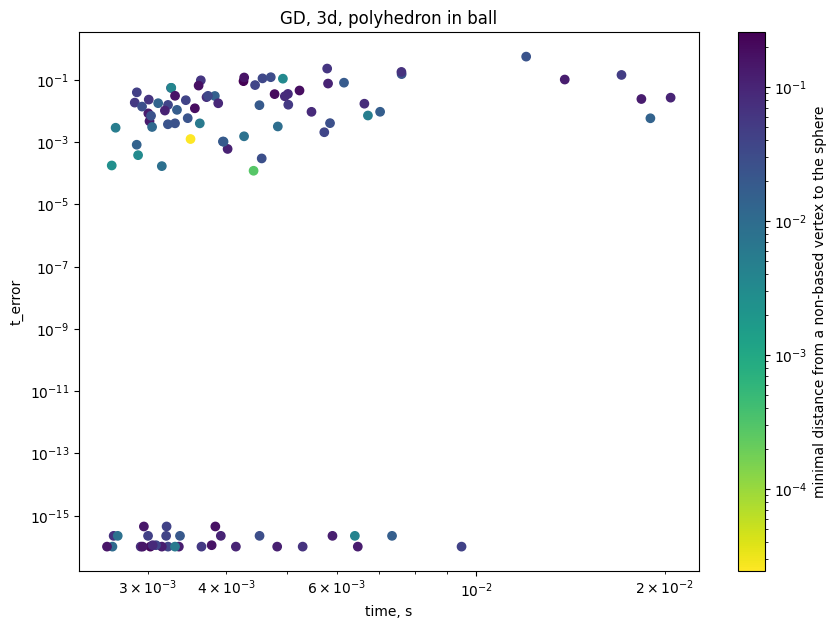

In [11]:
times_gd, errors_gd, ds = get_gd_polyhedron_in_ball_results(3, silent=False) 
plot_test_results(times_gd, errors_gd, 'GD, 3d, polyhedron in ball', fit=False, 
                  colors=ds, colorbar_name='minimal distance from a non-based vertex to the sphere')

test 1	 time 0.16349577903747559	 t_error 0.005256056602089609	 num_iterations 15
test 10	 time 0.005766391754150391	 t_error 6.702752845477722e-05	 num_iterations 5
test 100	 time 0.006458282470703125	 t_error 0.023013444139816874	 num_iterations 5
test 11	 time 0.006440639495849609	 t_error 0.03009151185428416	 num_iterations 5
test 12	 time 0.013144969940185547	 t_error 0.00022766554877473588	 num_iterations 6
test 13	 time 0.005700349807739258	 t_error 0.0	 num_iterations 5
test 14	 time 0.016998291015625	 t_error 0.002576746891661985	 num_iterations 6
test 15	 time 0.19390177726745605	 t_error 0.2745622100566991	 num_iterations 12
test 16	 time 0.006607770919799805	 t_error 0.05727712105786842	 num_iterations 5
test 17	 time 0.01715254783630371	 t_error 0.0	 num_iterations 7
test 18	 time 0.00640559196472168	 t_error 0.003132046233324415	 num_iterations 5
test 19	 time 0.01644444465637207	 t_error 4.440892098500626e-16	 num_iterations 6
test 2	 time 0.006502628326416016	 t_error 0

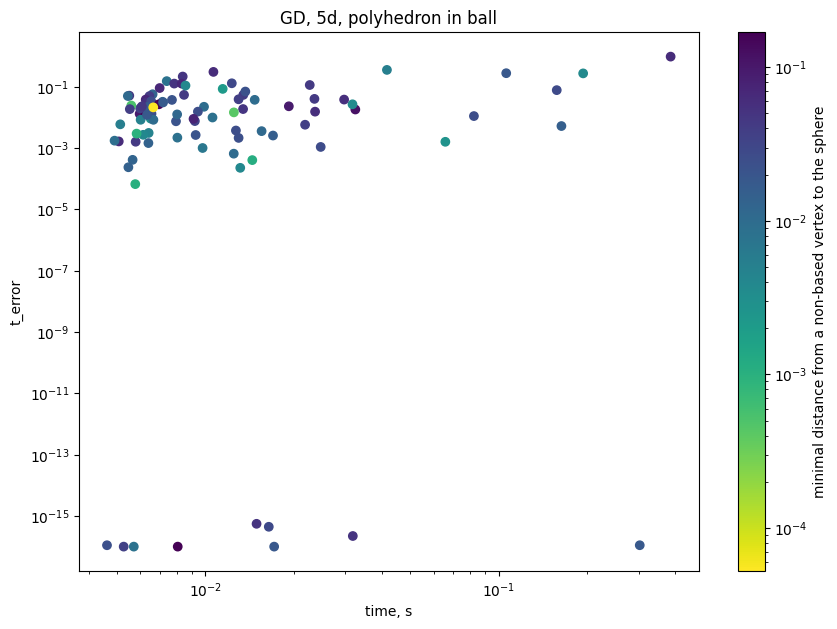

In [12]:
times_gd, errors_gd, ds = get_gd_polyhedron_in_ball_results(5, silent=False) 
plot_test_results(times_gd, errors_gd, 'GD, 5d, polyhedron in ball', fit=False, 
                  colors=ds, colorbar_name='minimal distance from a non-based vertex to the sphere')

test 1	 time 0.027692556381225586	 t_error 0.010324079506388806	 num_iterations 5
test 10	 time 0.0478358268737793	 t_error 0.07639189501770183	 num_iterations 7
test 100	 time 0.0865945816040039	 t_error 0.0064305494978698086	 num_iterations 14
test 11	 time 0.02673482894897461	 t_error 0.02929436411281494	 num_iterations 7
test 12	 time 0.18201231956481934	 t_error 0.01142007942919987	 num_iterations 25
test 13	 time 0.04718422889709473	 t_error 0.09245289417970604	 num_iterations 8
test 14	 time 0.031417131423950195	 t_error 0.04735711654400232	 num_iterations 8
test 15	 time 0.010325193405151367	 t_error 0.052109006562936155	 num_iterations 5
test 16	 time 0.016516685485839844	 t_error 0.5548158779995926	 num_iterations 5
test 17	 time 0.156019926071167	 t_error 0.04975115250185702	 num_iterations 21
test 18	 time 0.0698854923248291	 t_error 0.05113053065552098	 num_iterations 11
test 19	 time 0.00994420051574707	 t_error 0.0656454884970945	 num_iterations 5
test 2	 time 0.07953333

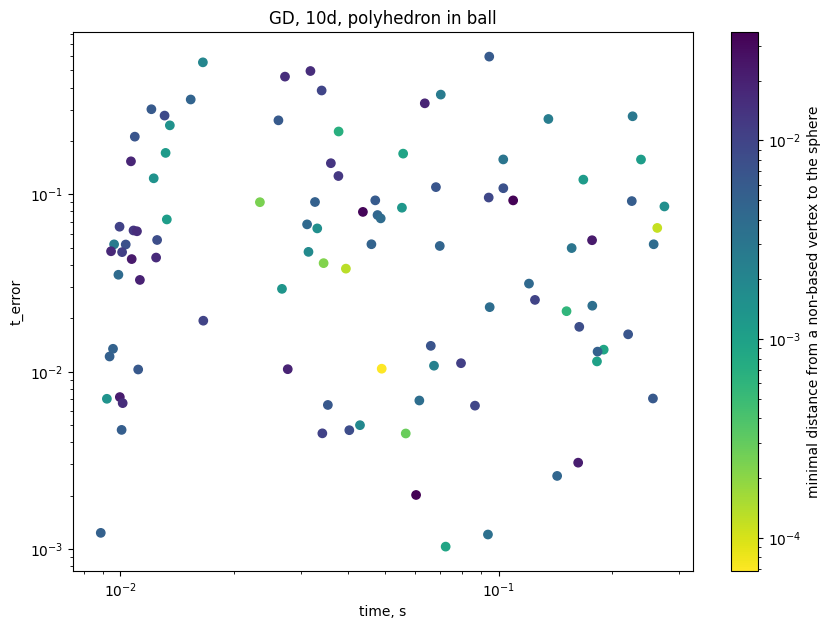

In [13]:
times_gd, errors_gd, ds = get_gd_polyhedron_in_ball_results(10, silent=False) 
plot_test_results(times_gd, errors_gd, 'GD, 10d, polyhedron in ball', fit=False, 
                  colors=ds, colorbar_name='minimal distance from a non-based vertex to the sphere')

times_gd, errors_gd = get_gd_simplex_plus_ball_in_ball_results(5, silent=False)
plot_test_results(times_gd, errors_gd, 'GD, 5d, simplex plus ball in ball', fit=False)

times_gd, errors_gd = get_gd_simplex_plus_ball_in_ball_results(10, silent=False)
plot_test_results(times_gd, errors_gd, 'GD, 10d, simplex plus ball in ball', fit=False)

times_gd, errors_gd = get_gd_simplex_plus_ball_in_ball_results(20, silent=False)
plot_test_results(times_gd, errors_gd, 'GD, 20d, simplex plus ball in ball', fit=False)

times_gd, errors_gd = get_gd_simplex_plus_ball_in_ball_results(50, silent=False)
plot_test_results(times_gd, errors_gd, 'GD, 50d, simplex plus ball in ball', fit=False)

times_gd, errors_gd = get_gd_simplex_plus_ball_in_ball_results(100, silent=False)
plot_test_results(times_gd, errors_gd, 'GD, 100d, simplex plus ball in ball', fit=False)

times_gd_2d, errors_gd_2d = get_gd_simplex_in_ball_results(2, silent=True)
plot_test_results(times_gd_2d, errors_gd_2d, 'GD, 2d, simplex in ball', fit=False)

times_gd, errors_gd = get_gd_simplex_in_ball_results(3, silent=False)
plot_test_results(times_gd, errors_gd, 'GD, 3d, simplex in ball', fit=False)

times_gd, errors_gd = get_gd_simplex_in_ball_results(4, silent=False)
plot_test_results(times_gd, errors_gd, 'GD, 4d, simplex in ball', fit=False)

times_gd, errors_gd = get_gd_simplex_in_ballшш_results(5, silent=False)
plot_test_results(times_gd, errors_gd, 'GD, 5d, simplex in ball', fit=False)

times_gd, errors_gd = get_gd_simplex_in_ball_results(10, silent=False)
plot_test_results(times_gd, errors_gd, 'GD, 10d, simplex in ball', fit=False)

times_gd, errors_gd = get_gd_simplex_in_ball_results(20, silent=False)
plot_test_results(times_gd, errors_gd, 'GD, 20d, simplex in ball', fit=False)

times_gd, errors_gd = get_gd_simplex_in_ball_results(50, silent=False)
plot_test_results(times_gd, errors_gd, 'GD, 50d, simplex in ball', fit=False)

times_gd, errors_gd = get_gd_simplex_in_ball_results(100, silent=False)
plot_test_results(times_gd, errors_gd, 'GD, 100d, simplex in ball', fit=False)

In [14]:
%load_ext line_profiler

In [15]:
file = random.choice(os.listdir('./tests/10d/simplex-in-ball/')) 
support_a, support_b, delta = read_tests_simplex_in_ball(f'./tests/10d/simplex-in-ball/{file}', 10) 
GradientDescentSolver(10, support_a, support_b, max_num_iterations=100, 
                                                max_finding_distinct_minimums_attempts=10, learning_rate=1)
%prun solver_instance.solve()

         142 function calls (138 primitive calls) in 0.001 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 _multivariate.py:3495(rvs)
    15/11    0.000    0.000    0.000    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.000    0.000 GradientDescentSolver.py:51(regular_simplex)
        1    0.000    0.000    0.000    0.000 linalg.py:469(inv)
        3    0.000    0.000    0.000    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.000    0.000    0.000    0.000 utils.py:372(<lambda>)
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        1    0.000    0.000    0.001    0.001 GradientDescentSolver.py:121(solve)
        2    0.000    0.000    0.000    0.000 {method 'normal' of 'numpy.random.mtrand.RandomState' objects}
        2    0.000    0.000    0.000    0.000 twodim_bas

In [16]:
def get_baseline_test_results(dimension: int, number_tests: int, lowest_grid_density: float=100, highest_grid_density: float=10000,
                             silent=True) -> tp.Tuple[np.ndarray, np.ndarray]:
    times = []
    t_errors = []
    for _ in range(number_tests):
        time, t_error = run_random_test(BaselineSolver, dimension, 
                                        {'grid_density': np.exp(np.random.uniform(np.log(lowest_grid_density), np.log(highest_grid_density)))}, 
                                        read_tests_simplex_in_ball, f'./tests/{dimension}d/simplex-in-ball/', silent=silent)
        times.append(time)
        t_errors.append(t_error)
    
    return np.array(times), np.array(t_errors)

In [17]:
def get_iterative_test_results(dimension: int, number_tests: int, lowest_cap_grid_diameter: int=3, 
                               highest_cap_grid_diameter: int=10,
                              silent=True) -> tp.Tuple[np.ndarray, np.ndarray]:
    times = []
    t_errors = []
    for _ in range(number_tests):
        cap_grid_diameter = int(np.round(np.exp(np.random.uniform(np.log(lowest_cap_grid_diameter), np.log(highest_cap_grid_diameter)))))
        time, t_error = run_random_test(IterativeSolver, dimension, 
                                        {'cap_grid_diameter': cap_grid_diameter}, 
                                        read_tests_simplex_in_ball, f'./tests/{dimension}d/simplex-in-ball/', silent=silent)
        times.append(time)
        t_errors.append(t_error)
    
    return np.array(times), np.array(t_errors)

In [18]:
def get_greedy_simplex_in_ball_results(dimension: int, lowest_max_iteration: int=80, highest_max_iteration: int=80, 
                            silent=True) -> tp.Tuple[np.ndarray, np.ndarray]:
    times = []
    t_errors = []
    deltas = []
    for file in sorted(os.listdir(f'./tests/{dimension}d/simplex-in-ball/')):
        support_a, support_b, delta = read_tests_simplex_in_ball(f'./tests/{dimension}d/simplex-in-ball/{file}', dimension)
        solver_instance = GreedySolver(dimension, support_a, support_b, 
                                 num_iterations=int(np.exp(np.random.uniform(np.log(lowest_max_iteration), np.log(highest_max_iteration)))))
        start_time = time.time()
        solver_instance.solve()
        end_time = time.time()
        times.append(end_time - start_time)
        t_errors.append(abs(1. - solver_instance.t))
        deltas.append(delta)
        if not silent:
            print(f'test \t{file}\t time \t{end_time - start_time}\t t_error \t{abs(1. - solver_instance.t)}')

    return np.array(times), np.array(t_errors), np.array(deltas)

In [19]:
def get_greedy_simplex_plus_ball_in_ball_results(dimension: int, lowest_max_iteration: int=100, highest_max_iteration: int=100, 
                            silent=True) -> tp.Tuple[np.ndarray, np.ndarray]:
    times = []
    t_errors = []
    deltas = []
    for file in sorted(os.listdir(f'./tests/{dimension}d/simplex-in-ball/')):
        support_a, support_b, delta = read_tests_simplex_plus_ball_in_ball(f'./tests/{dimension}d/simplex-plus-ball-in-ball/{file}', dimension)
        solver_instance = GreedySolver(dimension, support_a, support_b, 
                                 num_iterations=int(np.exp(np.random.uniform(np.log(lowest_max_iteration), np.log(highest_max_iteration)))))
        start_time = time.time()
        solver_instance.solve()
        end_time = time.time()
        times.append(end_time - start_time)
        t_errors.append(abs(1. - solver_instance.t))
        deltas.append(delta)
        if not silent:
            print(f'test \t{file}\t time \t{end_time - start_time}\t t_error \t{abs(1. - solver_instance.t)}')

    return np.array(times), np.array(t_errors), np.array(deltas)

In [20]:
def get_greedy_degenerate_simplex_in_ball_results(dimension: int, lowest_max_iteration: int=100, highest_max_iteration: int=100, 
                            silent=True) -> tp.Tuple[np.ndarray, np.ndarray]:
    times = []
    t_errors = []
    for file in sorted(os.listdir(f'./tests/{dimension}d/simplex-in-ball/')):
        support_a, support_b = read_tests_degenerate_simplex_in_ball(f'./tests/{dimension}d/degenerate-simplex-in-ball/{file}', dimension)
        solver_instance = GreedySolver(dimension, support_a, support_b, 
                                 num_iterations=int(np.exp(np.random.uniform(np.log(lowest_max_iteration), np.log(highest_max_iteration)))))
        start_time = time.time()
        solver_instance.solve()
        end_time = time.time()
        times.append(end_time - start_time)
        t_errors.append(abs(1. - solver_instance.t))
        if not silent:
            print(f'test \t{file}\t time \t{end_time - start_time}\t t_error \t{abs(1. - solver_instance.t)}')

    return np.array(times), np.array(t_errors)

In [21]:
def get_greedy_polyhedron_in_ball_results(dimension: int, lowest_max_iteration: int=100, highest_max_iteration: int=100, 
                            silent=True) -> tp.Tuple[np.ndarray, np.ndarray]:
    times = []
    t_errors = []
    d = []
    for file in sorted(os.listdir(f'./tests/{dimension}d/polyhedron-in-ball/')):
        support_a, support_b, current_d = read_tests_polyhedron_in_ball(f'./tests/{dimension}d/polyhedron-in-ball/{file}', dimension)
        solver_instance = GreedySolver(dimension, support_a, support_b, 
                                 num_iterations=int(np.exp(np.random.uniform(np.log(lowest_max_iteration), np.log(highest_max_iteration)))))
        start_time = time.time()
        solver_instance.solve()
        end_time = time.time()
        times.append(end_time - start_time)
        t_errors.append(abs(1. - solver_instance.t))
        d.append(current_d)
        if not silent:
            print(f'test \t{file}\t time \t{end_time - start_time}\t t_error \t{abs(1. - solver_instance.t)}')

    return np.array(times), np.array(t_errors), np.array(d)

file = random.choice(os.listdir('./tests/10d/simplex-in-ball/'))
support_a, support_b, delta = read_tests_simplex_in_ball(f'./tests/10d/simplex-in-ball/{file}', 10)
solver_instance = GreedySolver(10, support_a, support_b, num_iterations=500)

%prun solver_instance.solve()

times_greedy_2d, errors_greedy_2d, d_greedy_2d = get_greedy_polyhedron_in_ball_results(2, silent=True)
plot_test_results(times_greedy_2d, errors_greedy_2d, 'GreedySolver, 2d, polyhedron in ball', fit=False, colors=d_greedy_2d, 
                  colorbar_name='minimal distance from a non-based vertex to the sphere')

times_greedy_3d, errors_greedy_3d, d_greedy_3d = get_greedy_polyhedron_in_ball_results(3, silent=True) 
plot_test_results(times_greedy_3d, errors_greedy_3d, 'GreedySolver, 3d, polyhedron in ball', fit=False, colors=d_greedy_3d, 
                  colorbar_name='minimal distance from a non-based vertex to the sphere')

times_greedy_4d, errors_greedy_4d, d_greedy_4d = get_greedy_polyhedron_in_ball_results(4, silent=True) 
plot_test_results(times_greedy_4d, errors_greedy_4d, 'GreedySolver, 4d, polyhedron in ball', fit=False, colors=d_greedy_4d, 
                  colorbar_name='minimal distance from a non-based vertex to the sphere')

times_greedy_5d, errors_greedy_5d, d_greedy_5d = get_greedy_polyhedron_in_ball_results(5, silent=True) 
plot_test_results(times_greedy_5d, errors_greedy_5d, 'GreedySolver, 5d, polyhedron in ball', fit=False, colors=d_greedy_5d, 
                  colorbar_name='minimal distance from a non-based vertex to the sphere')

times_greedy_10d, errors_greedy_10d, d_greedy_10d = get_greedy_polyhedron_in_ball_results(10, silent=False) 
plot_test_results(times_greedy_10d, errors_greedy_10d, 'GreedySolver, 10d, polyhedron in ball', fit=False, colors=d_greedy_10d, 
                  colorbar_name='minimal distance from a non-based vertex to the sphere')

times_greedy_2d, errors_greedy_2d = get_greedy_degenerate_simplex_in_ball_results(2, silent=True)
plot_test_results(times_greedy_2d, errors_greedy_2d, 'GreedySolver, 2d, degenerate simplex', fit=False)

times_greedy_3d, errors_greedy_3d = get_greedy_degenerate_simplex_in_ball_results(3, silent=True)
plot_test_results(times_greedy_3d, errors_greedy_3d, 'GreedySolver, 3d, degenerate simplex', fit=False)

times_greedy_4d, errors_greedy_4d = get_greedy_degenerate_simplex_in_ball_results(4, silent=True)
plot_test_results(times_greedy_4d, errors_greedy_4d, 'GreedySolver, 4d, degenerate simplex', fit=False)

times_greedy_5d, errors_greedy_5d = get_greedy_degenerate_simplex_in_ball_results(5, silent=True)
plot_test_results(times_greedy_5d, errors_greedy_5d, 'GreedySolver, 5d, degenerate simplex', fit=False)

times_greedy_10d, errors_greedy_10d = get_greedy_degenerate_simplex_in_ball_results(10, silent=False)
plot_test_results(times_greedy_10d, errors_greedy_10d, 'GreedySolver, 10d, degenerate simplex', fit=False)

times_greedy_2d, errors_greedy_2d, deltas_greedy_2d = get_greedy_simplex_plus_ball_in_ball_results(2, silent=True)
plot_test_results(times_greedy_2d, errors_greedy_2d, deltas_greedy_2d, 'GreedySolver, 2d, simplex + ball, 50 iterations', fit=False)

times_greedy_3d, errors_greedy_3d, deltas_greedy_3d = get_greedy_simplex_plus_ball_in_ball_results(3, silent=True)
plot_test_results(times_greedy_3d, errors_greedy_3d, deltas_greedy_3d, 'GreedySolver, 3d, simplex + ball, 50 iterations', fit=False)

times_greedy_4d, errors_greedy_4d, deltas_greedy_4d = get_greedy_simplex_plus_ball_in_ball_results(4, silent=True)
plot_test_results(times_greedy_4d, errors_greedy_4d, deltas_greedy_4d, 'GreedySolver, 4d, simplex + ball, 50 iterations', fit=False)

times_greedy_5d, errors_greedy_5d, deltas_greedy_5d = get_greedy_simplex_plus_ball_in_ball_results(5, silent=True)
plot_test_results(times_greedy_5d, errors_greedy_5d, deltas_greedy_5d, 'GreedySolver, 5d, simplex + ball, 80 iterations', fit=False)

times_greedy_10d, errors_greedy_10d, deltas_greedy_10d = get_greedy_simplex_plus_ball_in_ball_results(10, silent=False)
plot_test_results(times_greedy_10d, errors_greedy_10d, deltas_greedy_10d, 'GreedySolver, 10d, simplex + ball, 100 iterations', fit=False)

times_greedy_2d, errors_greedy_2d, deltas_greedy_2d = get_greedy_test_results(2, silent=False)
plot_test_results(times_greedy_2d, errors_greedy_2d, deltas_greedy_2d, 'GreedySolver, 2d, n(n+1) caps with heuristic, random inscribed simplex', fit=False)

times_greedy_3d, errors_greedy_3d, deltas_greedy_3d = get_greedy_test_results(3, silent=False)
plot_test_results(times_greedy_3d, errors_greedy_3d, deltas_greedy_3d, 'GreedySolver, 3d, n(n+1) caps with heuristic, random inscribed simplex', fit=False)

times_greedy_4d, errors_greedy_4d, deltas_greedy_4d = get_greedy_test_results(4, silent=False)
plot_test_results(times_greedy_4d, errors_greedy_4d, deltas_greedy_4d, 'GreedySolver, 4d, n(n+1) caps with heuristic, random inscribed simplex', fit=False)

times_greedy_5d, errors_greedy_5d, deltas_greedy_5d = get_greedy_test_results(5, silent=False)
plot_test_results(times_greedy_5d, errors_greedy_5d, deltas_greedy_5d, 'GreedySolver, 5d, n(n+1) caps with heuristic, random inscribed simplex', fit=False)

times_greedy_10d, errors_greedy_10d, deltas_greedy_10d = get_greedy_test_results(10, silent=False)
plot_test_results(times_greedy_10d, errors_greedy_10d, deltas_greedy_10d, 'GreedySolver, 10d, n(n+1) caps with heuristic, random inscribed simplex', fit=False)

times_iterative_2d, errors_iterative_2d = get_iterative_test_results(2, 100, silent=True, highest_cap_grid_diameter=3)
plot_test_results(times_iterative_2d, errors_iterative_2d, 'IterativeSolver, 2d, n(n+1) caps with startovers, random inscribed simplex', fit=False)

times_iterative_3d, errors_iterative_3d = get_iterative_test_results(3, 100, silent=True, highest_cap_grid_diameter=3)
plot_test_results(times_iterative_3d, errors_iterative_3d, 'IterativeSolver, 3d, n(n+1) caps with startovers, random inscribed simplex', fit=False)

times_iterative_4d, errors_iterative_4d = get_iterative_test_results(4, 100, silent=True, highest_cap_grid_diameter=3)
plot_test_results(times_iterative_4d, errors_iterative_4d, 'IterativeSolver, 4d, n(n+1) caps with startovers, random inscribed simplex', fit=False)

times_iterative_5d, errors_iterative_5d = get_iterative_test_results(5, 100, silent=True, highest_cap_grid_diameter=3)
plot_test_results(times_iterative_5d, errors_iterative_5d, 'IterativeSolver, 5d, n(n+1) caps with startovers, random inscribed simplex', fit=False)

times_baseline_2d, errors_baseline_2d = get_baseline_test_results(2, 1000)

plot_test_results(times_baseline_2d, errors_baseline_2d, 'BaselineSolver, 2d, grid_from_cube, random inscribed simplex')

times_baseline_3d, errors_baseline_3d = get_baseline_test_results(3, 1000)

plot_test_results(times_baseline_3d, errors_baseline_3d, 'BaselineSolver, 3d, grid_from_cube, random inscribed simplex')

times_baseline_4d, errors_baseline_4d = get_baseline_test_results(4, 1000)

plot_test_results(times_baseline_4d, errors_baseline_4d, 'BaselineSolver, 4d, grid_from_cube, random inscribed simplex')

times_baseline_5d, errors_baseline_5d = get_baseline_test_results(5, 1000)

plot_test_results(times_baseline_5d, errors_baseline_5d, 'BaselineSolver, 5d, grid_from_cube, random inscribed simplex')